In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
in_file = pd.read_csv("/home/amorelli/r_estimate/B_maps_white_noise/results_double_test/log",delim_whitespace=True, index_col=0)
nout=1

In [3]:
keys=list(in_file.columns)# i get the name of the columns
index_lr=keys.index("lr") #in the log i have the loss then lr then all the metrics evaluated on training set then all the metrics
#evaluated on validation
keys.pop(index_lr) #i remove lr label
dim=len(keys)
half_dim=int(dim/2)
loss_metrics=keys[:half_dim] #the labels of the metrics evaluated on the training set are the first half 
val_metrics=keys[half_dim:] #the labels of the metrics evaluated on the validation set are the second half

print("metrics (evaluated on training set and validation set) on 1st epoch vs metrics (..) on last epoch")
for key_loss,key_val in zip(loss_metrics,val_metrics):
    print(key_loss," epoch 0:",in_file[key_loss][0],"\t","last epoch:",in_file[key_loss][len(in_file)-1])
    print(key_val," epoch 0:",in_file[key_val][0],"\t","last epoch:",in_file[key_val][len(in_file)-1])
    print("\n")
if nout>1:
    s_l_val=in_file["val_loss"][len(in_file)-1]-in_file["val_mse_tau"][len(in_file)-1]
    print("sigma_loss_validation=",s_l_val)
    print("the ratio between sigma_loss_validation and val_mse_tau at last epoch is:", s_l_val/in_file["val_mse_tau"][len(in_file)-1])

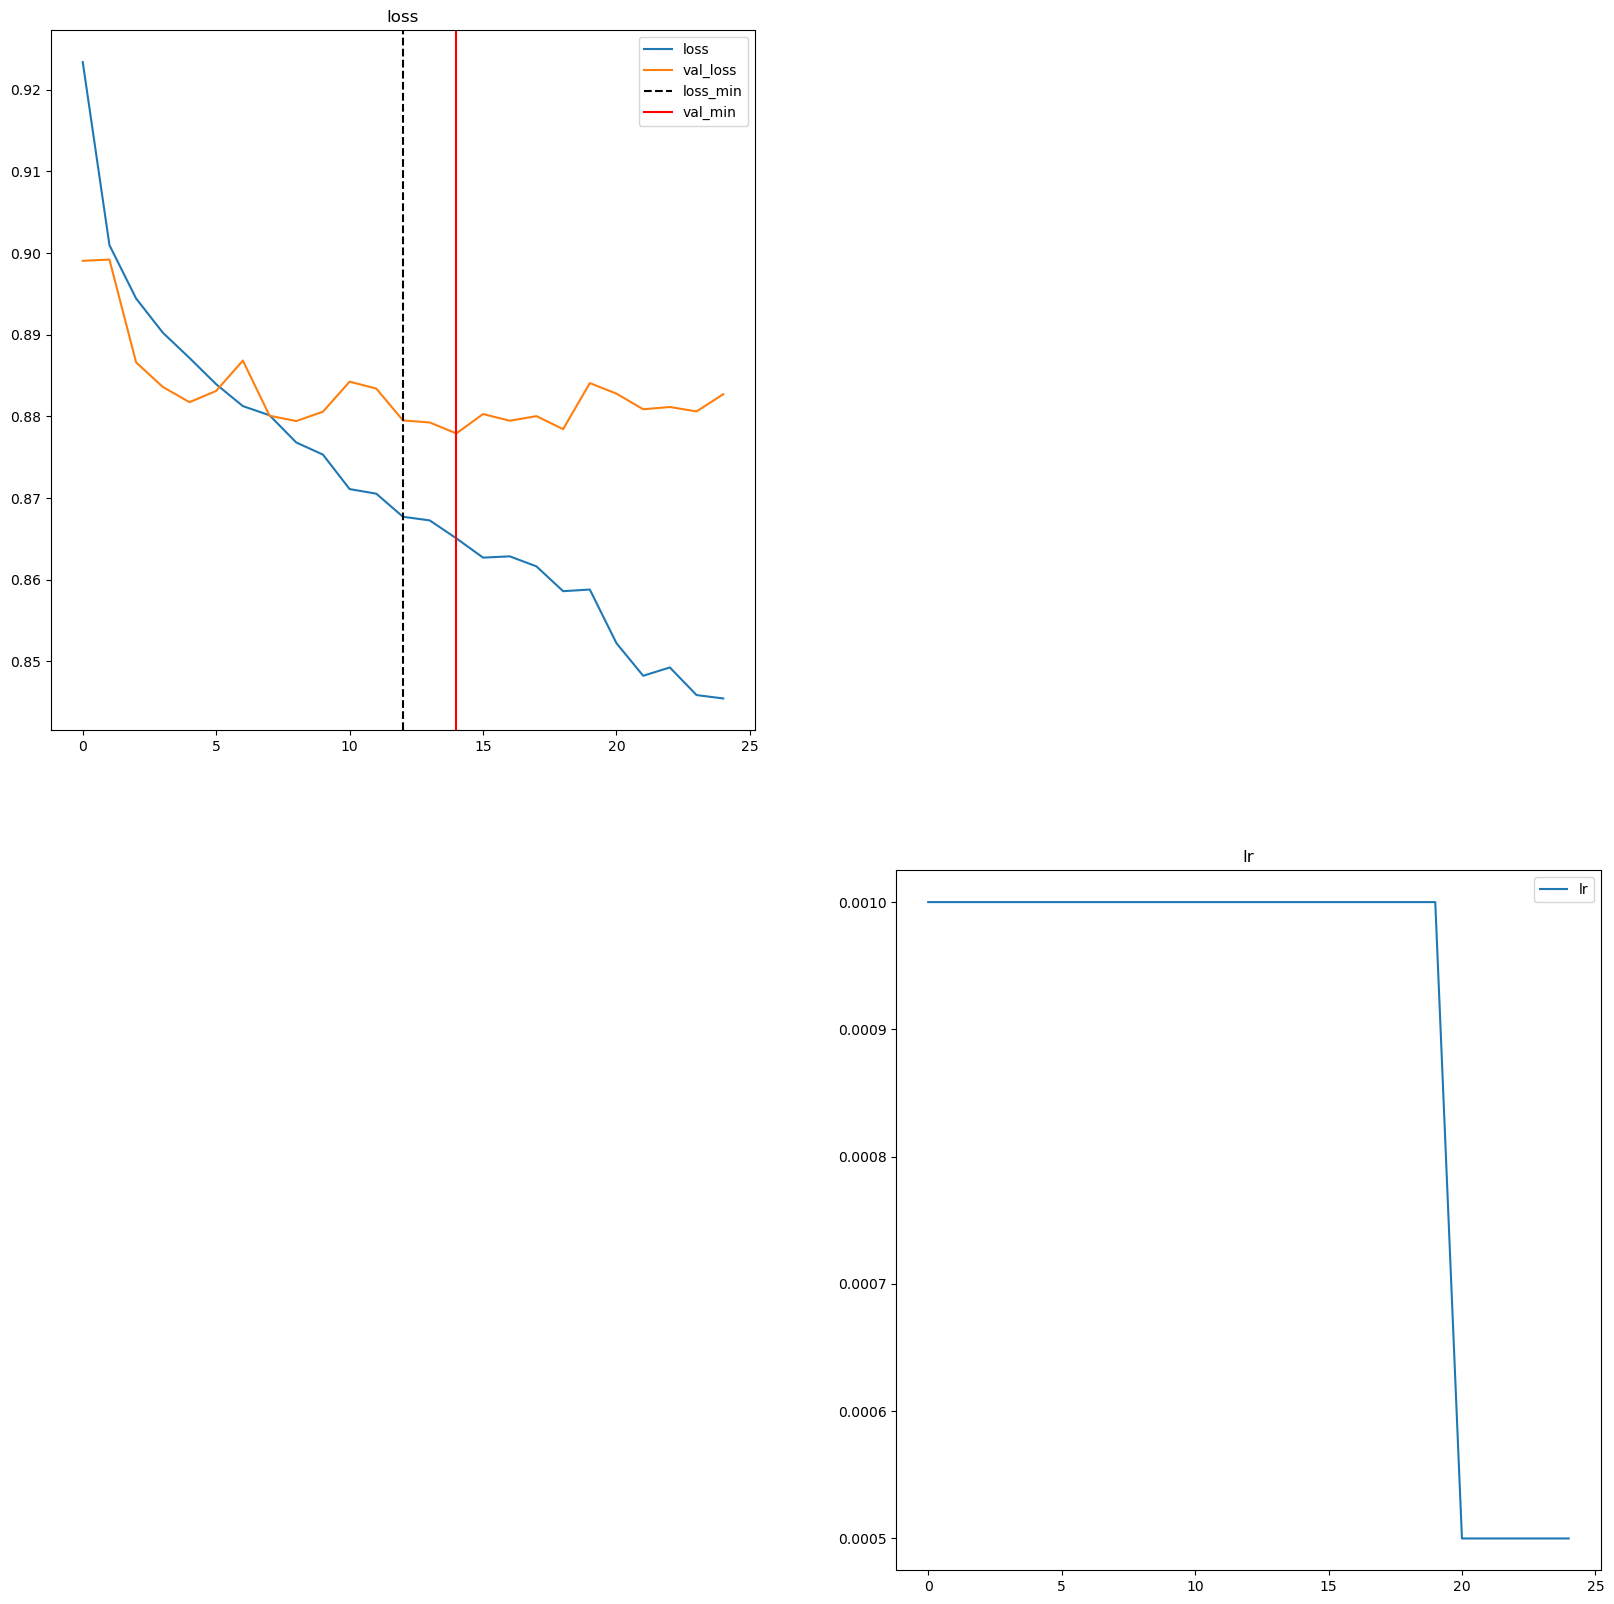

In [8]:
fig = plt.figure(figsize=(20,20))
epochs=in_file.index 
dim_fig=dim
for i in range(1,half_dim): # i find the smallest i such that i^2 > number of metrics to plot
    if i*i>=half_dim+1:
        dim_fig=i
        break
second_half=0
for i in range(1,len(epochs)):
    if epochs[i]==0:
        second_half=i
st=0
end=second_half
for i in range(half_dim):
    plt.subplot(dim_fig,dim_fig,i+1)
    plt.plot(epochs[st:end],in_file[loss_metrics[i]][st:end],label=loss_metrics[i])
    plt.plot(epochs[st:end],in_file[val_metrics[i]][st:end],label=val_metrics[i])
    plt.axvline(in_file[loss_metrics[i]].idxmin(), color="black", linestyle="--", label="loss_min")
    plt.axvline(in_file[val_metrics[i]].idxmin(), color="red", linestyle="-", label="val_min")
    plt.title(loss_metrics[i])
    plt.legend()
plt.subplot(dim_fig,dim_fig,int(dim_fig**2))
plt.plot(epochs[st:end],in_file["lr"][st:end],label="lr")
plt.title("lr")
plt.legend()

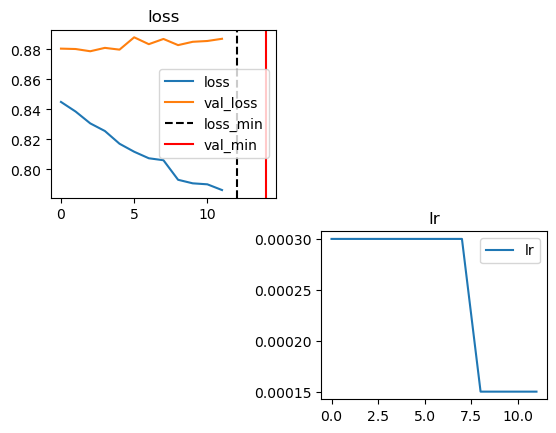

In [9]:
st=second_half
end=-1
for i in range(half_dim):
    plt.subplot(dim_fig,dim_fig,i+1)
    plt.plot(epochs[st:end],in_file[loss_metrics[i]][st:end],label=loss_metrics[i])
    plt.plot(epochs[st:end],in_file[val_metrics[i]][st:end],label=val_metrics[i])
    plt.axvline(in_file[loss_metrics[i]].idxmin(), color="black", linestyle="--", label="loss_min")
    plt.axvline(in_file[val_metrics[i]].idxmin(), color="red", linestyle="-", label="val_min")
    plt.title(loss_metrics[i])
    plt.legend()
plt.subplot(dim_fig,dim_fig,int(dim_fig**2))
plt.plot(epochs[st:end],in_file["lr"][st:end],label="lr")
plt.title("lr")
plt.legend()